## This Notebook added a column of Average Adjusted Gross Income  to the Existing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('../data/master_jerry.csv')
del df['Unnamed: 0']
df.head()

alias  \
0  重庆特色小面-chongqing-special-noodles-san-gabriel-3   
1               重庆小面-best-noodle-house-rosemead-3   
2  眞-jin-cook-authentic-korean-soul-food-glendale   
3                 新湘好-xiang-cuisine-monterey-park   
4               いざかや-おせん-izakaya-osen-los-angeles   

                        categories           city                      id  \
0           ['noodles', 'chinese']    San Gabriel  mm6l24khOfXhKqn4pKVojA   
1          ['noodles', 'szechuan']       Rosemead  DgXxBgUEvARu45x7RSgYRw   
2                       ['korean']       Glendale  C5s9a_prs6TbH510Bt_sqQ   
3                      ['chinese']  Monterey Park  5FzLCjOW6mqjlQE-wNsjQg   
4  ['sushi', 'izakaya', 'seafood']    Los Angeles  us0WnDOySVXXXwCqs0AaCw   

    latitude   longitude  price  rating  review_count  zip_code  
0  34.103070 -118.091840      1     4.0         204.0     91776  
1  34.081182 -118.066226      1     4.0         141.0     91770  
2  34.150364 -118.254602      2     4.5          59.0     91203  
3  34.063719 -118.134591      2     4.5         113.0     91754  
4  34.083192 -118.273245      2     4.5         656.0     90026

In [3]:
df['zip_code'].sort_values(ascending = True)

24942    90000
16074    90000
4228     90001
9998     90001
6769     90001
         ...  
25371    93955
4691     95020
7849     96137
14920    97630
28716    98188
Name: zip_code, Length: 28823, dtype: int64

In [4]:
df['zip_code'].sort_values().value_counts()

90028    357
90012    320
91748    312
90045    295
90802    244
        ... 
92647      1
92407      1
91759      1
98188      1
96137      1
Name: zip_code, Length: 432, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28823 entries, 0 to 28822
Data columns (total 10 columns):
alias           28823 non-null object
categories      28823 non-null object
city            28823 non-null object
id              28823 non-null object
latitude        28823 non-null float64
longitude       28823 non-null float64
price           28823 non-null int64
rating          28823 non-null float64
review_count    28823 non-null float64
zip_code        28823 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.2+ MB


In [6]:
df.isnull().sum()

alias           0
categories      0
city            0
id              0
latitude        0
longitude       0
price           0
rating          0
review_count    0
zip_code        0
dtype: int64

In [7]:
df = df[df['zip_code'] <= 93591]

In [8]:
df = df[df['zip_code'] != 90000]

In [9]:
zip_list = list(df['zip_code'].sort_values().unique())

In [10]:
zip_list = [str(z) for z in zip_list]

In [11]:
zip_list

['90001',
 '90002',
 '90003',
 '90004',
 '90005',
 '90006',
 '90007',
 '90008',
 '90009',
 '90010',
 '90011',
 '90012',
 '90013',
 '90014',
 '90015',
 '90016',
 '90017',
 '90018',
 '90019',
 '90020',
 '90021',
 '90022',
 '90023',
 '90024',
 '90025',
 '90026',
 '90027',
 '90028',
 '90029',
 '90031',
 '90032',
 '90033',
 '90034',
 '90035',
 '90036',
 '90037',
 '90038',
 '90039',
 '90040',
 '90041',
 '90042',
 '90043',
 '90044',
 '90045',
 '90046',
 '90047',
 '90048',
 '90049',
 '90052',
 '90056',
 '90057',
 '90058',
 '90059',
 '90060',
 '90061',
 '90062',
 '90063',
 '90064',
 '90065',
 '90066',
 '90067',
 '90068',
 '90069',
 '90071',
 '90073',
 '90077',
 '90078',
 '90079',
 '90089',
 '90094',
 '90095',
 '90101',
 '90189',
 '90201',
 '90209',
 '90210',
 '90211',
 '90212',
 '90220',
 '90221',
 '90222',
 '90230',
 '90232',
 '90240',
 '90241',
 '90242',
 '90245',
 '90247',
 '90248',
 '90249',
 '90250',
 '90254',
 '90255',
 '90260',
 '90261',
 '90262',
 '90263',
 '90265',
 '90266',
 '90270',


In [12]:
irs = pd.read_csv('../data/IRSIncomeByZipCode.csv')
irs.head(10)

STATE  ZIPCODE  Number of returns  Adjusted gross income (AGI)    Avg AGI  \
0    AL        0            2022380                    105089761  51.963410   
1    AL    35004               4930                       255534  51.832454   
2    AL    35005               3300                       128387  38.905152   
3    AL    35006               1230                        58302  47.400000   
4    AL    35007              11990                       643708  53.687073   
5    AL    35010               8320                       378497  45.492428   
6    AL    35014               1610                        67205  41.742236   
7    AL    35016               7030                       329461  46.865007   
8    AL    35019                930                        34909  37.536559   
9    AL    35020               9970                       260241  26.102407   

   Number of returns with total income  Total income amount  Avg total income  \
0                              2022380            106420533         52.621433   
1                                 4930               258024         52.337525   
2                                 3300               129390         39.209091   
3                                 1230                58585         47.630081   
4                                11990               651350         54.324437   
5                                 8320               382106         45.926202   
6                                 1610                67885         42.164596   
7                                 7030               333226         47.400569   
8                                  930                35392         38.055914   
9                                 9970               262475         26.326479   

   Number of returns with taxable income  Taxable income amount  \
0                                1468370               67850874   
1                                   4020                 163859   
2                                   2440                  70760   
3                                    940                  36341   
4                                   9280                 414878   
5                                   5610                 226514   
6                                   1180                  38277   
7                                   5080                 204874   
8                                    650                  19152   
9                                   5520                 110968   

   Avg taxable income  
0           46.208295  
1           40.760945  
2           29.000000  
3           38.660638  
4           44.706681  
5           40.376827  
6           32.438136  
7           40.329528  
8           29.464615  
9           20.102899

In [13]:
irs.columns = [col.lower() for col in irs.columns.str.replace(' ', '_')]

In [14]:
zip_agi = irs.loc[irs['zipcode'].isin(zip_list),['zipcode','avg_agi']]

In [15]:
zip_agi.rename(columns={'zipcode': 'zip_code'}, inplace=True)

In [16]:
zip_agi.head()

zip_code    avg_agi
1410     90001  25.152933
1411     90002  24.410496
1412     90003  23.404622
1413     90004  59.128947
1414     90005  45.821128

In [17]:
df_income = pd.merge(df, zip_agi, how = 'outer' )
df_income

alias  \
0      重庆特色小面-chongqing-special-noodles-san-gabriel-3   
1                          yung-ho-cafe-san-gabriel-2   
2                             yun-nan-168-san-gabriel   
3                            yum-cha-cafe-san-gabriel   
4                          yuk-dae-jang-san-gabriel-2   
...                                               ...   
28811                                boba-time-walnut   
28812                                  baps-oceanside   
28813                    bangkok-cafe-north-hollywood   
28814                alborz-restaurant-woodland-hills   
28815                 a-bite-of-jersey-garden-grove-2   

                                            categories             city  \
0                               ['noodles', 'chinese']      San Gabriel   
1         ['taiwanese', 'chinese', 'breakfast_brunch']      San Gabriel   
2                                          ['chinese']      San Gabriel   
3                                ['dimsum', 'hotdogs']      San Gabriel   
4                                           ['korean']      San Gabriel   
...                                                ...              ...   
28811                  ['icecream', 'coffee', 'cafes']           Walnut   
28812                                   ['foodstands']        Oceanside   
28813                                         ['thai']  North Hollywood   
28814                        ['mideastern', 'persian']   Woodland Hills   
28815  ['cheesesteaks', 'sandwiches', 'chicken_wings']     Garden Grove   

                           id   latitude   longitude  price  rating  \
0      mm6l24khOfXhKqn4pKVojA  34.103070 -118.091840      1     4.0   
1      zO8V4fi49QQMn4Sa_0OS9g  34.081429 -118.084785      1     3.0   
2      6J_4QelYHplaLHzof1VEyg  34.080849 -118.090324      1     3.0   
3      KD_fdBnwN3TbJYJ8mcvq4Q  34.078899 -118.092026      1     3.0   
4      DwvljRkxkMEljQBYX-MeTw  34.102080 -118.109870      2     4.5   
...                       ...        ...         ...    ...     ...   
28811  KdP7hy5sh_3rvhqjCPvgxw  33.986748 -117.869105      1     3.5   
28812  FVBgAN591l9sljCHCsY1Rw  33.206660 -117.303090      2     4.0   
28813  781cayN2BltvRW3-8FY87Q  34.179160 -118.404830      1     2.0   
28814  t5M5X2TzaqxCStGxTH9odg  34.179350 -118.623720      2     4.0   
28815  Gr4TtbfG10vmgOkFdnadYw  33.780935 -118.041427      1     4.0   

       review_count  zip_code    avg_agi  
0             204.0     91776  37.211020  
1             263.0     91776  37.211020  
2               4.0     91776  37.211020  
3             138.0     91776  37.211020  
4             158.0     91776  37.211020  
...             ...       ...        ...  
28811         281.0     91788        NaN  
28812           5.0     92056  57.641332  
28813           2.0     91617        NaN  
28814         227.0     91399        NaN  
28815         161.0     92845  72.275806  

[28816 rows x 11 columns]

In [ ]:
    nrows = int(np.ceil(len(zip_list)/4))
    
    fig, ax = plt.subplots(nrows=nrows,
                           ncols=2,
                           sharey=True,
                           figsize=(2 * size_factor, nrows * size_factor)
                          ) 
    ax = ax.ravel() # turns ax matrix into vector so it's more iterable
    
    for i, column in enumerate(columns):
        ax[i].hist(df[column]) 
    for j, title in enumerate(titles):
        ax[j].set_title(title)
    for k, xlabel in enumerate(xlabels):
        ax[k].set_xlabel(xlabel)
        
    plt.tight_layout()

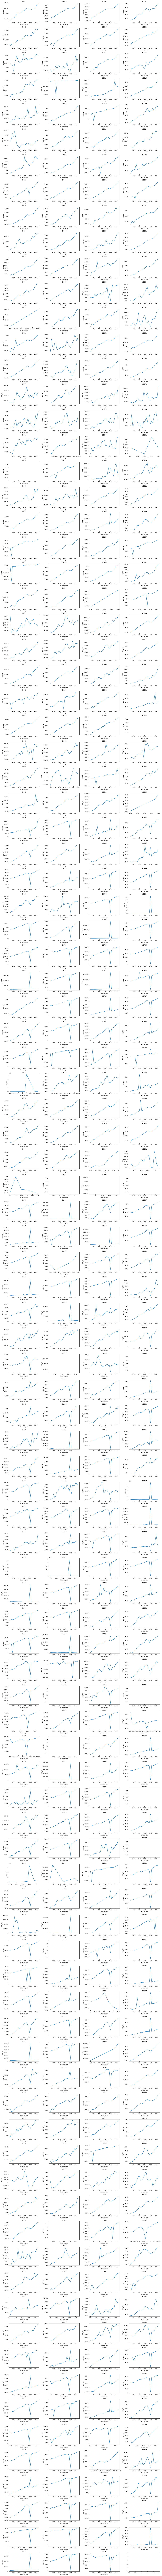

In [101]:
size_factor = 3
nrows = int(np.ceil(len(zip_list)/4))

fig, ax = plt.subplots(nrows=nrows,
                       ncols=4,
                       figsize=(1.6 * size_factor * 4, nrows * size_factor)
                      )
ax = ax.ravel()

for i, zipcode in enumerate(list(zip_list)):
    sns.lineplot(x=irs[irs['zip_code'] == zipcode]['taxable_year'],
                 y=irs[irs['zip_code'] == zipcode]['avg_agi'],
                 ax=ax[i])

    # creighton A : LA
    ax[i].set_title(zipcode)

plt.tight_layout()

In [106]:
zipcode = '90021'

irs[irs['zip_code'] == zipcode][['zip_code', 'taxable_year', 'ca_agi', 'returns', 'avg_agi']]

zip_code  taxable_year     ca_agi  returns        avg_agi
35685    90021          1992  130388565     1547   84284.786684
44963    90021          1993  135818561     1206  112619.038972
51820    90021          1994  172492115     1035  166659.048309
48711    90021          1995  139834461     1019  137227.145240
49534    90021          1996  185154056      962  192467.833680
50206    90021          1997  118277127      991  119351.288597
41103    90021          1998   47223159     1006   46941.509940
45300    90021          1999   46084973     1082   42592.396488
57708    90021          2000   18210832      892   20415.730942
49203    90021          2001   29124381      945   30819.450794
61235    90021          2002   58206901      921   63199.675353
55348    90021          2003   53505982      885   60458.736723
18372    90021          2004   52157605     1028   50736.969844
7315     90021          2005   55973408     1071   52262.752568
8259     90021          2006   55466080     1001   55410.669331
22964    90021          2007   77628565     1125   69003.168889
15928    90021          2008   77427164     1069   72429.526660
13652    90021          2009   60964840     1112   54824.496403
26917    90021          2010   71690216     1112   64469.618705
18161    90021          2011   64520825     1290   50016.143411
9129     90021          2012   62237102     1296   48022.455247
14865    90021          2013   86099008     1395   61719.718996
10980    90021          2014   96155916     1339   71811.737117
9699     90021          2015  110503311     1282   86196.030421
25507    90021          2016  128192294     1407   91110.372424
3780     90021          2017  136645997     1379   99090.643220

In [ ]:
irs_pivot = irs.pivot_table(index = ['Zip Code'])

In [ ]:
irs_pivot['avg_agi'] = irs_pivot['CA AGI'] / irs_pivot['Returns']

In [ ]:
irs_pivot.head()

In [ ]:
irs_agi = irs_pivot['avg_agi']

In [ ]:
df

In [ ]:
df_income = pd.merge(df, zip_agi,how = 'outer' )
df_income

In [ ]:
df_income.isnull().sum()

In [ ]:
df_income[df_income.isnull().any(axis=1)]

In [19]:
df_income.dropna(inplace = True)

In [20]:
df_income.isnull().sum()

alias           0
categories      0
city            0
id              0
latitude        0
longitude       0
price           0
rating          0
review_count    0
zip_code        0
avg_agi         0
dtype: int64

In [21]:
df_income.groupby('zip_code')['zip_code'].count().head(30)

zip_code
90001     93
90002     21
90003     71
90004    155
90005    147
90006    221
90007    162
90008     57
90010    143
90011    104
90012    320
90013    197
90014    161
90015    219
90016     79
90017    177
90018     50
90019    161
90020    207
90021     99
90022    175
90023    119
90024    160
90025    230
90026    214
90027    199
90028    357
90029    136
90031     63
90032     66
Name: zip_code, dtype: int64

In [ ]:
df_income['count'] = df_income.groupby('zip_code')['zip_code'].transform('count')

In [ ]:
# df_income_dummied = pd.get_dummies(df_income,columns=['price','rating'])

In [ ]:
df_income.pivot_table(index = ['zip_code'])

In [22]:
df_income.to_csv('../data/data_income_jerry.csv')